In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
proc = 'all_proc'
# proc = 'race_gender_proc'
# proc = 'black_female_proc'

bf_i, wm_i, b_i, w_i, f_i, m_i = [], [], [], [], [], []
bf_g, wm_g, b_g, w_g, f_g, m_g = [], [], [], [], [], []
bf_g0, wm_g0, b_g0, w_g0, f_g0, m_g0 = [], [], [], [], [], []

for i in range(1, 300):
    bf_sel, wm_sel, b_sel, w_sel, f_sel, m_sel = 0, 0, 0, 0, 0, 0
    bf_sel0, wm_sel0, b_sel0, w_sel0, f_sel0, m_sel0 = 0, 0, 0, 0, 0, 0
    bf_tot, wm_tot, b_tot, w_tot, f_tot, m_tot = 0, 0, 0, 0, 0, 0
    bf_tot0, wm_tot0, b_tot0, w_tot0, f_tot0, m_tot0 = 0, 0, 0, 0, 0, 0
    size = 0
    for f in range(1, 6):
        ff = pd.read_csv(f'./diagnostic/{proc}/diagnostic_all_fold{f}.csv')

        # num selected in fold (n_ig)
        bf_sel += len(ff[(ff['black'] == 1) & (ff['female'] == 1) & (ff[f'iteration_{i}'] == 1)])
        wm_sel += len(ff[(ff['white'] == 1) & (ff['male'] == 1) & (ff[f'iteration_{i}'] == 1)])
        b_sel += len(ff[(ff['black'] == 1) & (ff[f'iteration_{i}'] == 1)])
        w_sel += len(ff[(ff['white'] == 1) & (ff[f'iteration_{i}'] == 1)])
        f_sel += len(ff[(ff['female'] == 1) & (ff[f'iteration_{i}'] == 1)])
        m_sel += len(ff[(ff['male'] == 1) & (ff[f'iteration_{i}'] == 1)])

        # num selected in fold with negative outcome (n_ig0)
        bf_sel0 += len(ff[(ff['black'] == 1) & (ff['female'] == 1) & (ff[f'iteration_{i}'] == 1) & (ff[f'completed'] == 0)])
        wm_sel0 += len(ff[(ff['white'] == 1) & (ff['male'] == 1) & (ff[f'iteration_{i}'] == 1) & (ff[f'completed'] == 0)])
        b_sel0 += len(ff[(ff['black'] == 1) & (ff[f'iteration_{i}'] == 1) & (ff[f'completed'] == 0)])
        w_sel0 += len(ff[(ff['white'] == 1) & (ff[f'iteration_{i}'] == 1) & (ff[f'completed'] == 0)])
        f_sel0 += len(ff[(ff['female'] == 1) & (ff[f'iteration_{i}'] == 1) & (ff[f'completed'] == 0)])
        m_sel0 += len(ff[(ff['male'] == 1) & (ff[f'iteration_{i}'] == 1) & (ff[f'completed'] == 0)])


        # total num of subgroup in fold (n_g)
        bf_tot += len(ff[(ff['black'] == 1) & (ff['female'] == 1)])
        wm_tot += len(ff[(ff['white'] == 1) & (ff['male'] == 1)])
        b_tot += len(ff[(ff['black'] == 1)])
        w_tot += len(ff[(ff['white'] == 1)])
        f_tot += len(ff[(ff['female'] == 1)])
        m_tot += len(ff[(ff['male'] == 1)])

        # size of selected group (n_i)
        size += len(ff[ff[f'iteration_{i}'] == 1])

        # num of subgroup with negative outcome label (n_g0)
        bf_tot0 += len(ff[(ff['black'] == 1) & (ff['female'] == 1) & (ff[f'completed'] == 0)])
        wm_tot0 += len(ff[(ff['white'] == 1) & (ff['male'] == 1) & (ff[f'completed'] == 0)])
        b_tot0 += len(ff[(ff['black'] == 1) & (ff[f'completed'] == 0)])
        w_tot0 += len(ff[(ff['white'] == 1) & (ff[f'completed'] == 0)])
        f_tot0 += len(ff[(ff['female'] == 1) & (ff[f'completed'] == 0)])
        m_tot0 += len(ff[(ff['male'] == 1) & (ff[f'completed'] == 0)])

    
    bf_sel, wm_sel, b_sel, w_sel, f_sel, m_sel = bf_sel / 5, wm_sel / 5, b_sel / 5, w_sel / 5, f_sel / 5, m_sel / 5
    bf_sel0, wm_sel0, b_sel0, w_sel0, f_sel0, m_sel0 = bf_sel0 / 5, wm_sel0 / 5, b_sel0 / 5, w_sel0 / 5, f_sel0 / 5, m_sel0 / 5
    bf_tot, wm_tot, b_tot, w_tot, f_tot, m_tot = bf_tot / 5, wm_tot / 5, b_tot / 5, w_tot / 5, f_tot / 5, m_tot / 5
    bf_tot0, wm_tot0, b_tot0, w_tot0, f_tot0, m_tot0 = bf_tot0 / 5, wm_tot0 / 5, b_tot0 / 5, w_tot0 / 5, f_tot0 / 5, m_tot0 / 5
    size = size / 5

    bf_i.append(bf_sel / size) 
    wm_i.append(wm_sel / size) 
    b_i.append(b_sel / size)
    w_i.append(w_sel / size)
    f_i.append(f_sel / size)
    m_i.append(m_sel / size)

    bf_g.append(bf_sel / bf_tot)
    wm_g.append(wm_sel / wm_tot)
    b_g.append(b_sel / b_tot)
    w_g.append(w_sel / w_tot)
    f_g.append(f_sel / f_tot)
    m_g.append(m_sel / m_tot)

    bf_g0.append(bf_sel0 / bf_tot0)
    wm_g0.append(wm_sel0 / wm_tot0)
    b_g0.append(b_sel0 / b_tot0)
    w_g0.append(w_sel0 / w_tot0)
    f_g0.append(f_sel0 / f_tot0)
    m_g0.append(m_sel0 / m_tot0)
    



In [6]:
x = np.array(list(range(1, 300)))

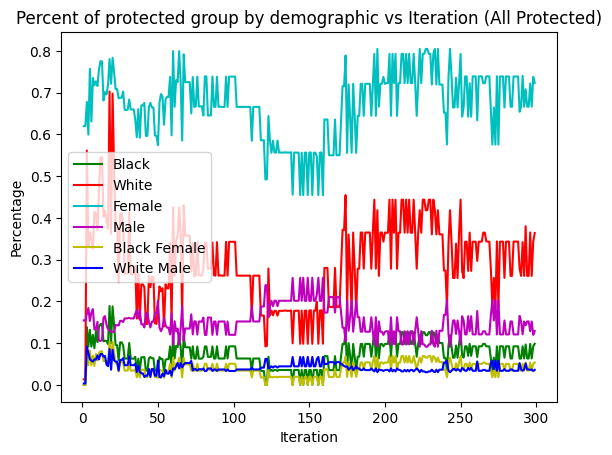

In [9]:
plt.plot(x, b_i, color='g', label='Black')
plt.plot(x, w_i, color='r', label='White')
plt.plot(x, f_i, color='c', label='Female')
plt.plot(x, m_i, color='m', label='Male')
plt.plot(x, bf_i, color='y', label='Black Female')
plt.plot(x, wm_i, color='b', label='White Male')

plt.xlabel('Iteration')
plt.ylabel('Percentage')
plt.legend()
plt.title("Percent of protected group by demographic vs Iteration (All Protected)")
plt.show()

In [ ]:
# ig/g

plt.plot(x, b_g, color='g', label='Black')
plt.plot(x, w_g, color='r', label='White')
plt.plot(x, f_g, color='c', label='Female')
plt.plot(x, m_g, color='m', label='Male')
plt.plot(x, bf_g, color='y', label='Black Female')
plt.plot(x, wm_g, color='b', label='White Male')

plt.xlabel('Iteration')
plt.ylabel('Percentage')
plt.legend()
plt.title("Percent of demographic subgroup chosen as protected vs Iteration (All Protected)")
plt.show()

In [ ]:
# ig/g0

plt.plot(x, b_g0, color='g', label='Black')
plt.plot(x, w_g0, color='r', label='White')
plt.plot(x, f_g0, color='c', label='Female')
plt.plot(x, m_g0, color='m', label='Male')
plt.plot(x, bf_g0, color='y', label='Black Female')
plt.plot(x, wm_g0, color='b', label='White Male')

plt.xlabel('Iteration')
plt.ylabel('Percentage')
plt.legend()
plt.title("Percent of negative outcome demographic subgroup chosen as protected vs Iteration (All Protected)")
plt.show()